# **<center>Computational Physics Problem Set #2</center>**
### <center>Cameron Foltz</center>

### Exercise 3.1: Plotting Experimental Data

a) Write a program that reads the sunspots.txt file.

b) Only display the first 1000 points

c) Calculate the running average where:

$$Y_k = \frac{1}{2r+1}\sum_{m=-r}^{r}y_{k+m}$$

with r = 5.

Plot the original data and the running average on the same graph for the first 1000 data points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

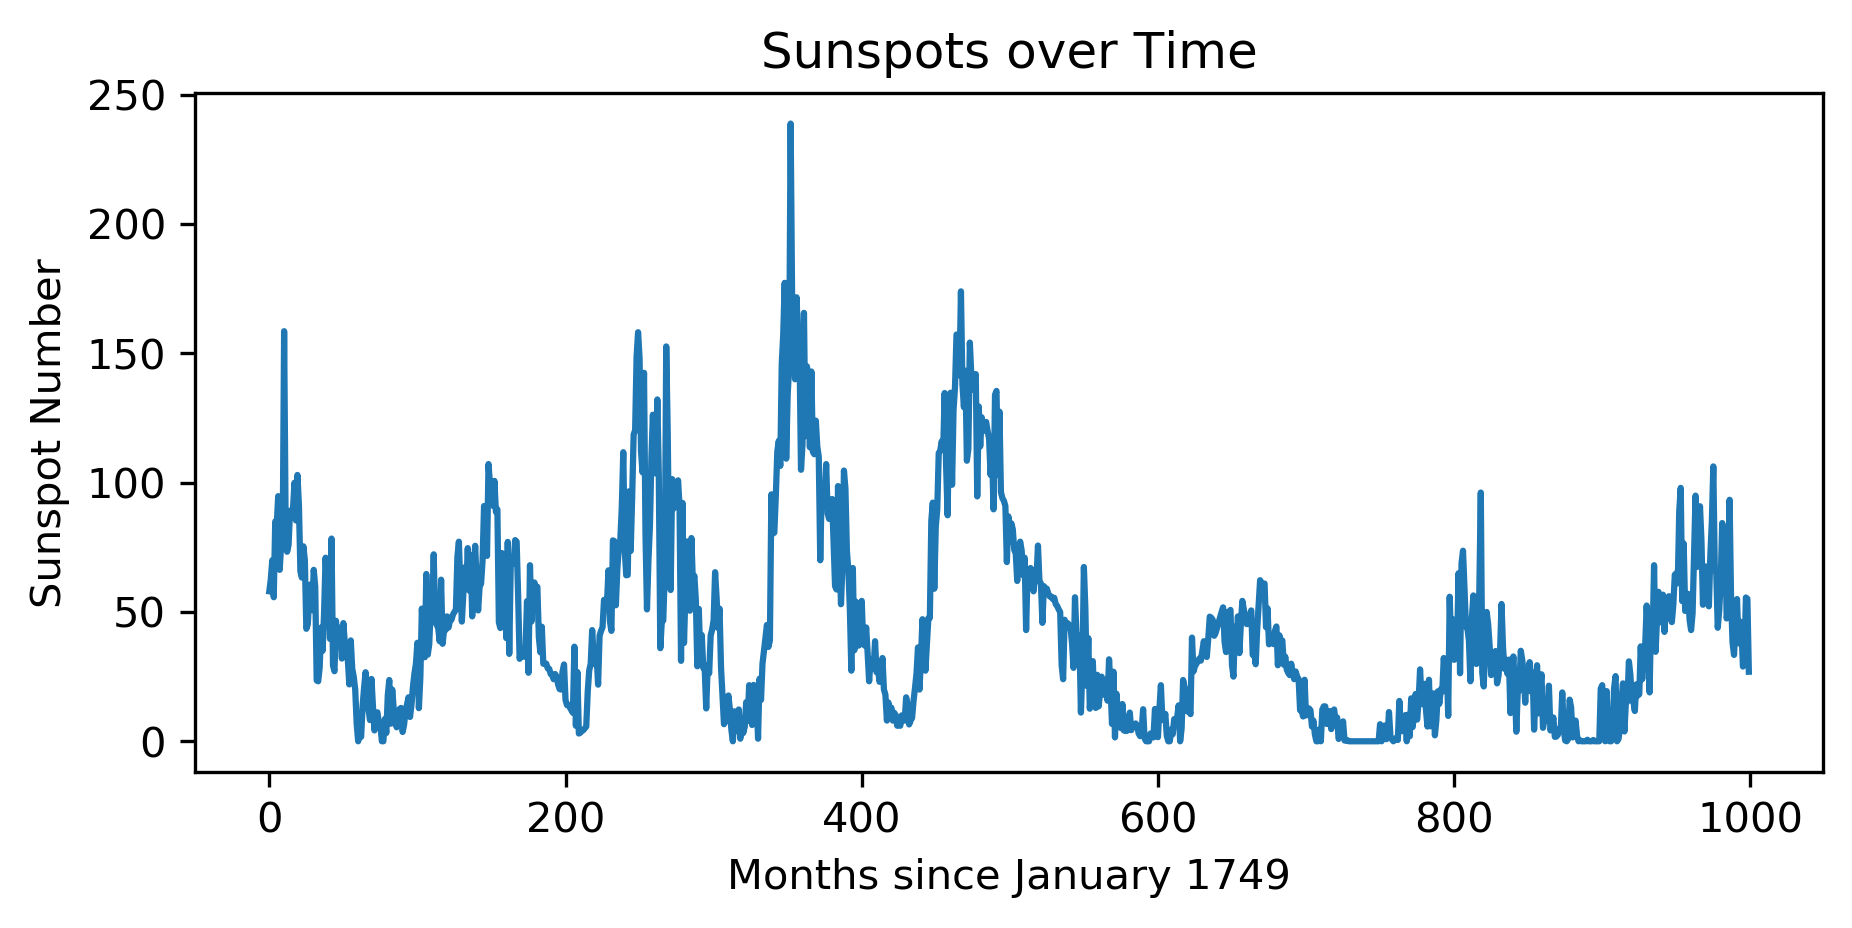

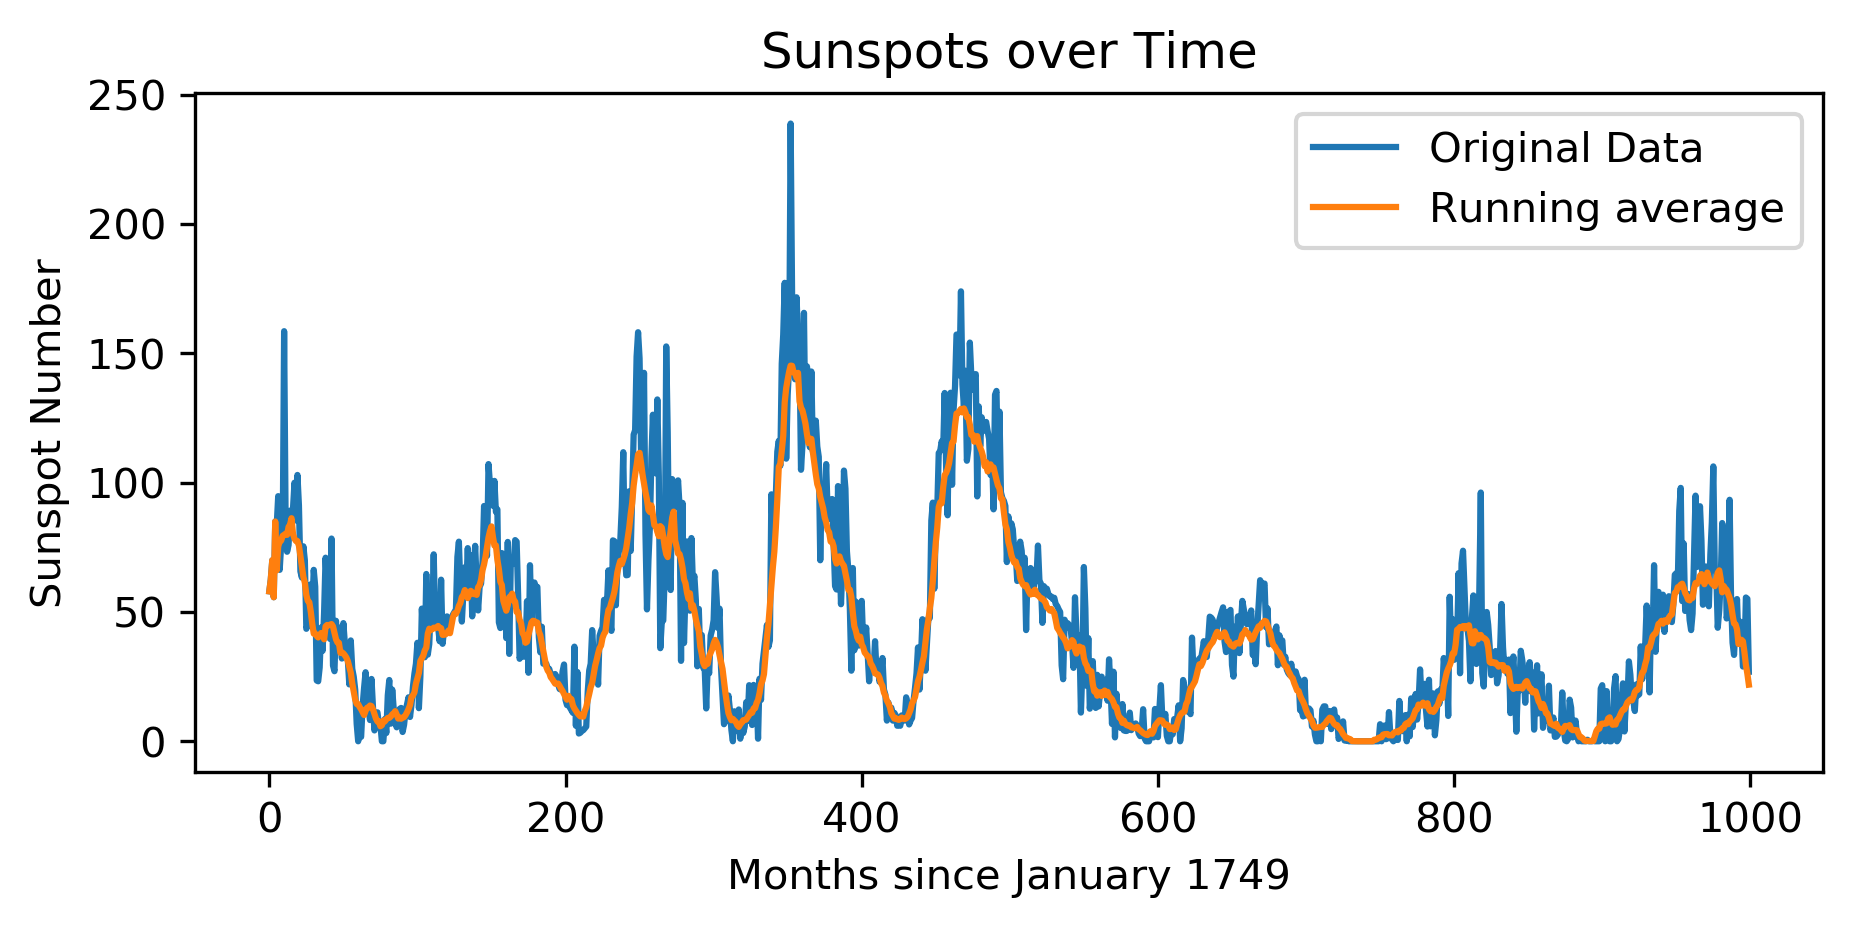

In [179]:
# Read file from the text file, returns array
sunspots = np.genfromtxt("./sunspots.txt")

# Seperate the two columns into x and y arrays
x = sunspots[:,0]
y = sunspots[:,1]

# create new x,y arrays with the first 1000 points
x1 = x[0:1000]
y1 = y[0:1000]

plt.figure(1, [7,3], dpi=300)
plt.plot(x1, y1)
plt.xlabel("Months since January 1749")
plt.ylabel("Sunspot Number")
plt.title("Sunspots over Time")
plt.show()

Yk = []
for i in range(len(y1)):
    if i < 5:
        Yk.append(y1[i])
    else:
        Yk.append(1/(2*5+1)*np.sum(y1[i-5:i+5]))
        
plt.figure(2, [7,3], dpi=300)
plt.plot(x1, y1, label ="Original Data")
plt.plot(x1, Yk, label = "Running average")
plt.xlabel("Months since January 1749")
plt.ylabel("Sunspot Number")
plt.title("Sunspots over Time")
plt.legend()
plt.show()

### Exercise 3.2: Curve Plotting

a) Plot the Deltoid Curve:
$$x = 2cos(\theta)+cos(2\theta)$$
$$y = 2sin(\theta)-sin(2\theta)$$

with $0\leq \theta \leq 2\pi$

We are going to pick 100 values from 0 to $2\pi$ to plot


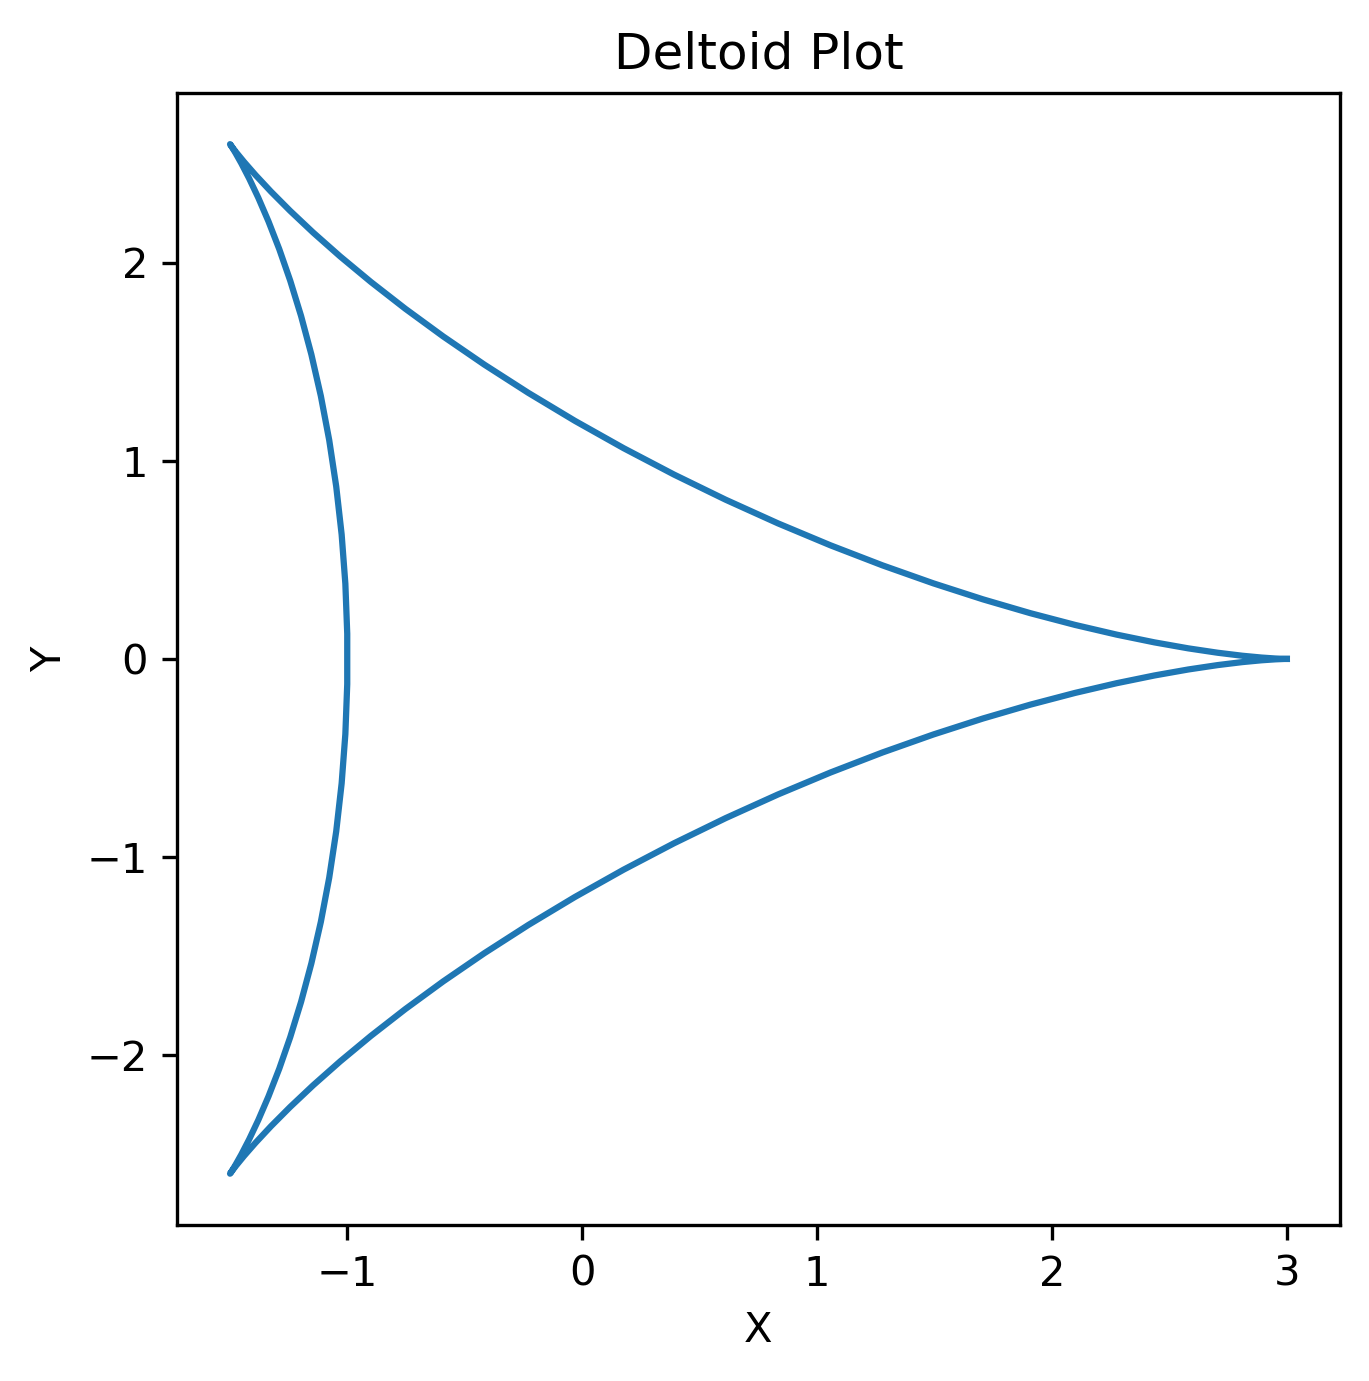

In [180]:
# Create blank arrays
X = []
Y = []

#append function into blank arrays
for i in np.linspace(0,2*np.pi, 100):
    X.append(2*np.cos(i)+np.cos(2*i))
    Y.append(2*np.sin(i)-np.sin(2*i))
    
# Plot
plt.figure(3, [5,5], dpi=300)
plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Deltoid Plot")
plt.show()

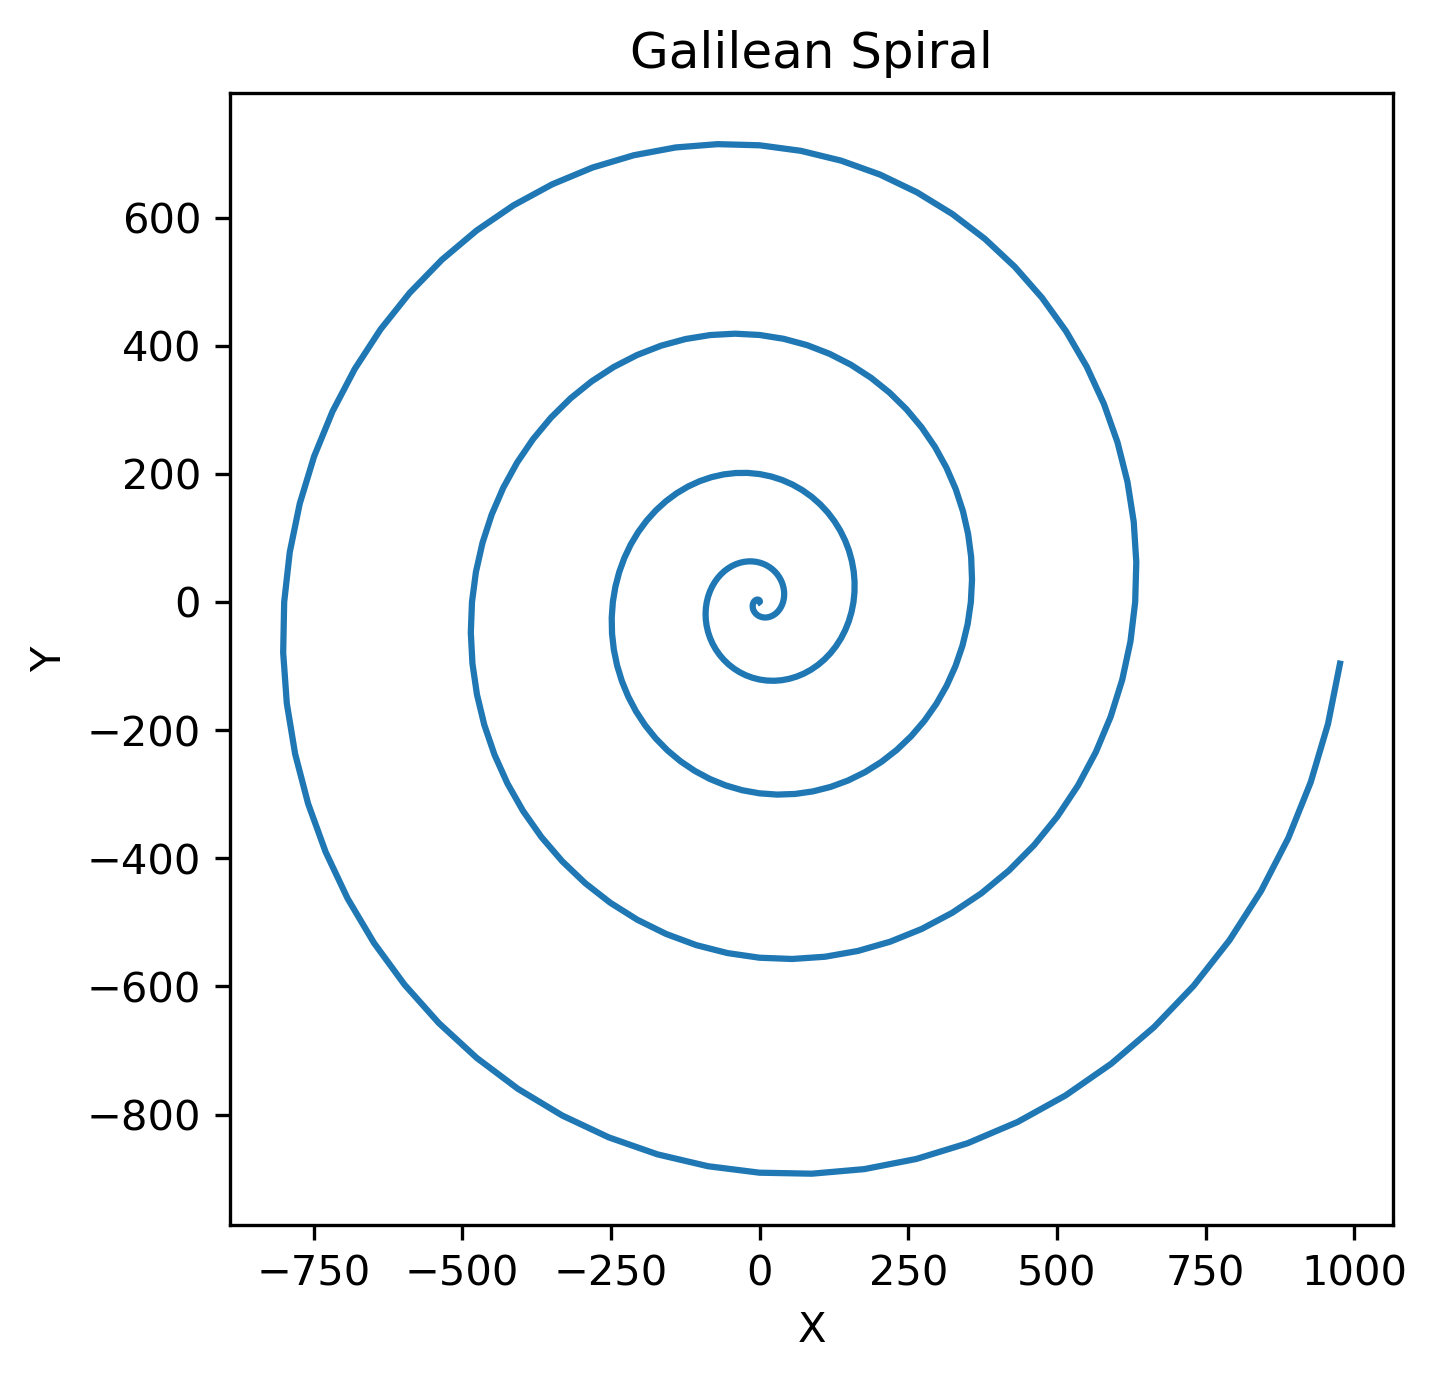

In [181]:
# Create a rang for theta and calculate r
theta = np.arange(0,10*np.pi,np.pi/32)
r = [i**2 for i in theta]

#Create blank arrays to append
X = []
Y = []

# Append x and y for values of theta and r
for i in range(len(r)):
    X.append(r[i]*np.cos(theta[i]))
    Y.append(r[i]*np.sin(theta[i]))
    
# plot
plt.figure(4, [5,5], dpi=300)
plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Galilean Spiral")
plt.show()

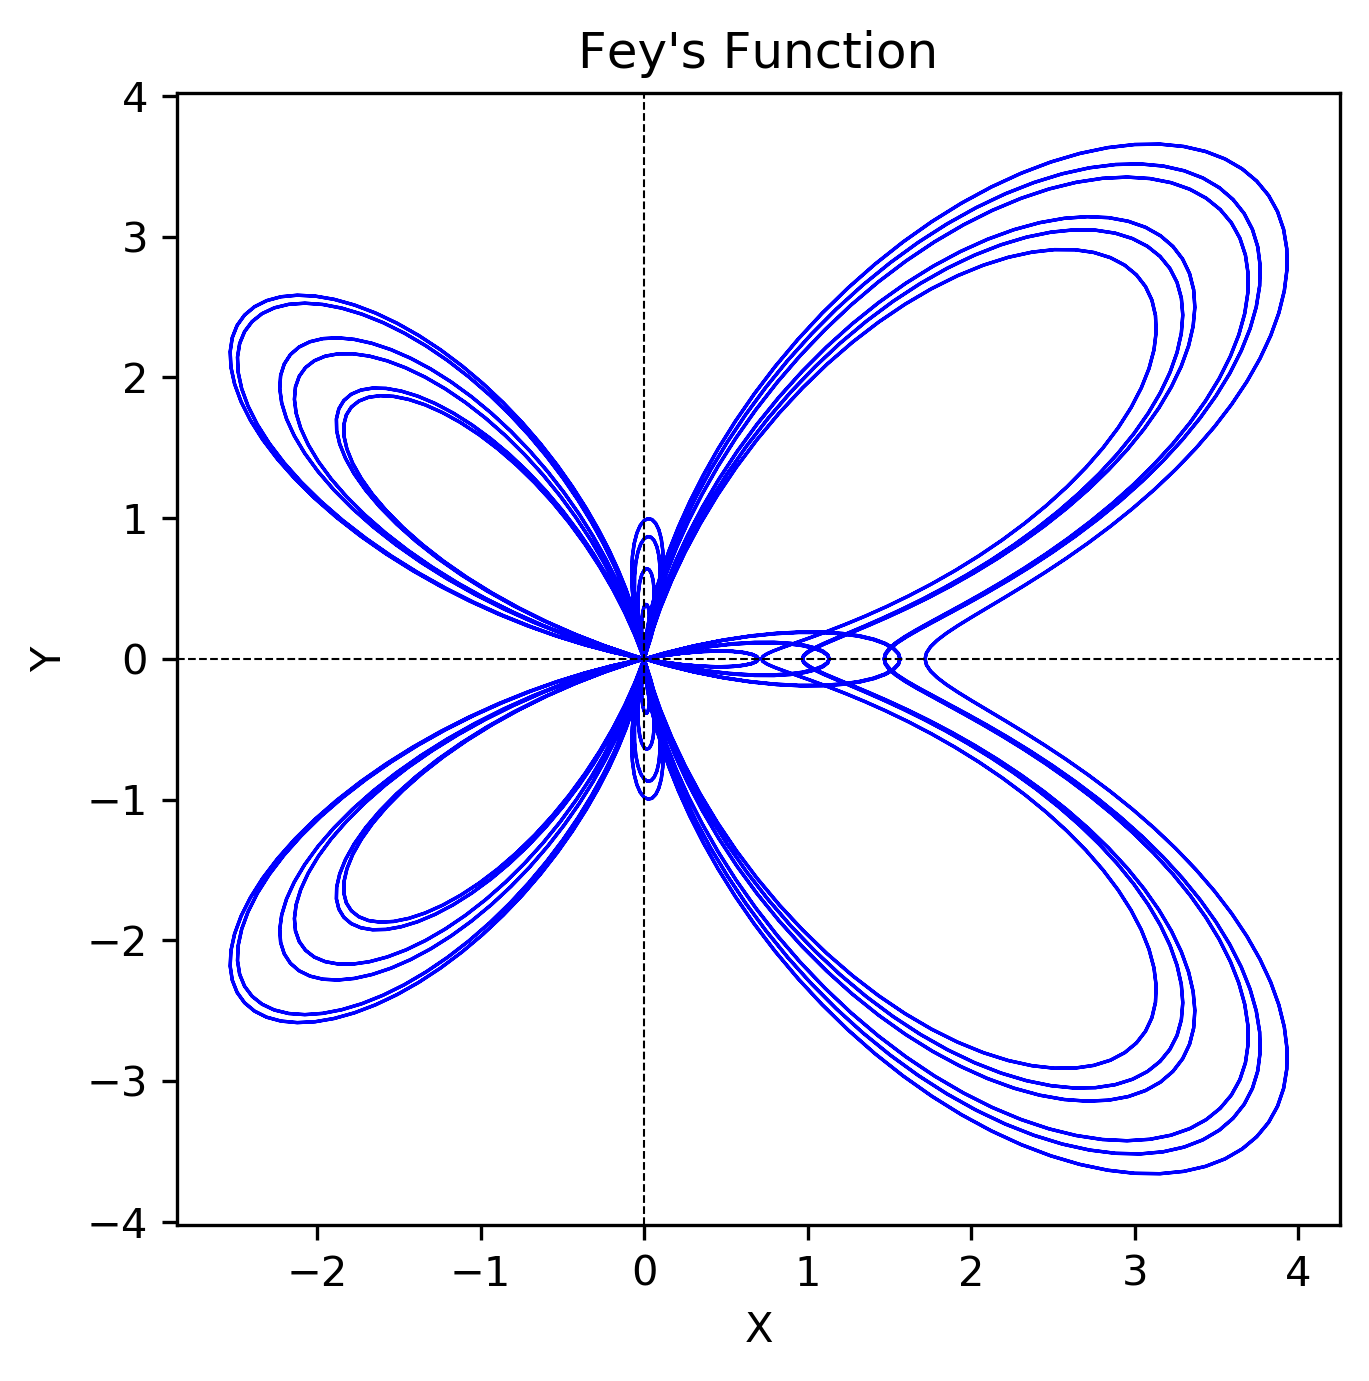

In [182]:
# Create a rang for theta and calculate r
theta = np.arange(0,24*np.pi,np.pi/128)
r = []
for i in theta:
    r.append(np.exp(np.cos(i))-2*np.cos(4*i)+np.sin(i/12)**2)

#Create blank arrays to append
X = []
Y = []

# Append x and y for values of theta and r
for i in range(len(r)):
    X.append(r[i]*np.cos(theta[i]))
    Y.append(r[i]*np.sin(theta[i]))
    
# plot
plt.figure(4, [5,5], dpi=300)
plt.plot(X,Y, ls='-', color='b', lw=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.axvline(0, color='k', ls='--', lw = 0.5)
plt.axhline(0, color='k', ls='--', lw = 0.5)
plt.title("Fey's Function")
plt.show()

### Exercise 3.8: Least Squares and photoelectric effect

a) Load millikan data and graph each point

b) calculate $E_x, E_y, E_{xx}, E_{xy}$ where
$$E_x = \frac{1}{N}\sum_{i=1}^{N}x_i$$
$$E_y = \frac{1}{N}\sum_{i=1}^{N}y_i$$
$$E_{xx} = \frac{1}{N}\sum_{i=1}^{N}x_i^2$$
$$E_{xy} = \frac{1}{N}\sum_{i=1}^{N}x_iy_i$$

and calculate the slop, $m$ and y-intercept, $c$ where

$$m = \frac{E_{xy}-E_xE_y}{E_{xx}-E_x^2}$$

$$c = \frac{E_{xx}E_y-E_xE_{xy}}{E_{xx}-E_x^2}$$

c) calculate $mx_i+c$ for each $x_i$ and plot them as a fit line

d) Calculate planck's constant from this data, where the x values are frequency $\nu$ and the y values are voltage $V$.  The equation that relates these values is:
$$V = \frac{h}{e}\nu-\phi$$

From this equation, it appears as though our calculated slope $m$ is equal to $m = \frac{h}{e}$ and our value of $c$ is equal to $c=-\phi$.  We therefore multiply our value of $m$ by $e = 1.602x10^{-19}$ to find the value for Planck's constant $h$.

The accepted value for $h$ is $6.626176 x 10^{-34}$

The value of m is 4.088227358517516e-15
The value of c is -1.7312


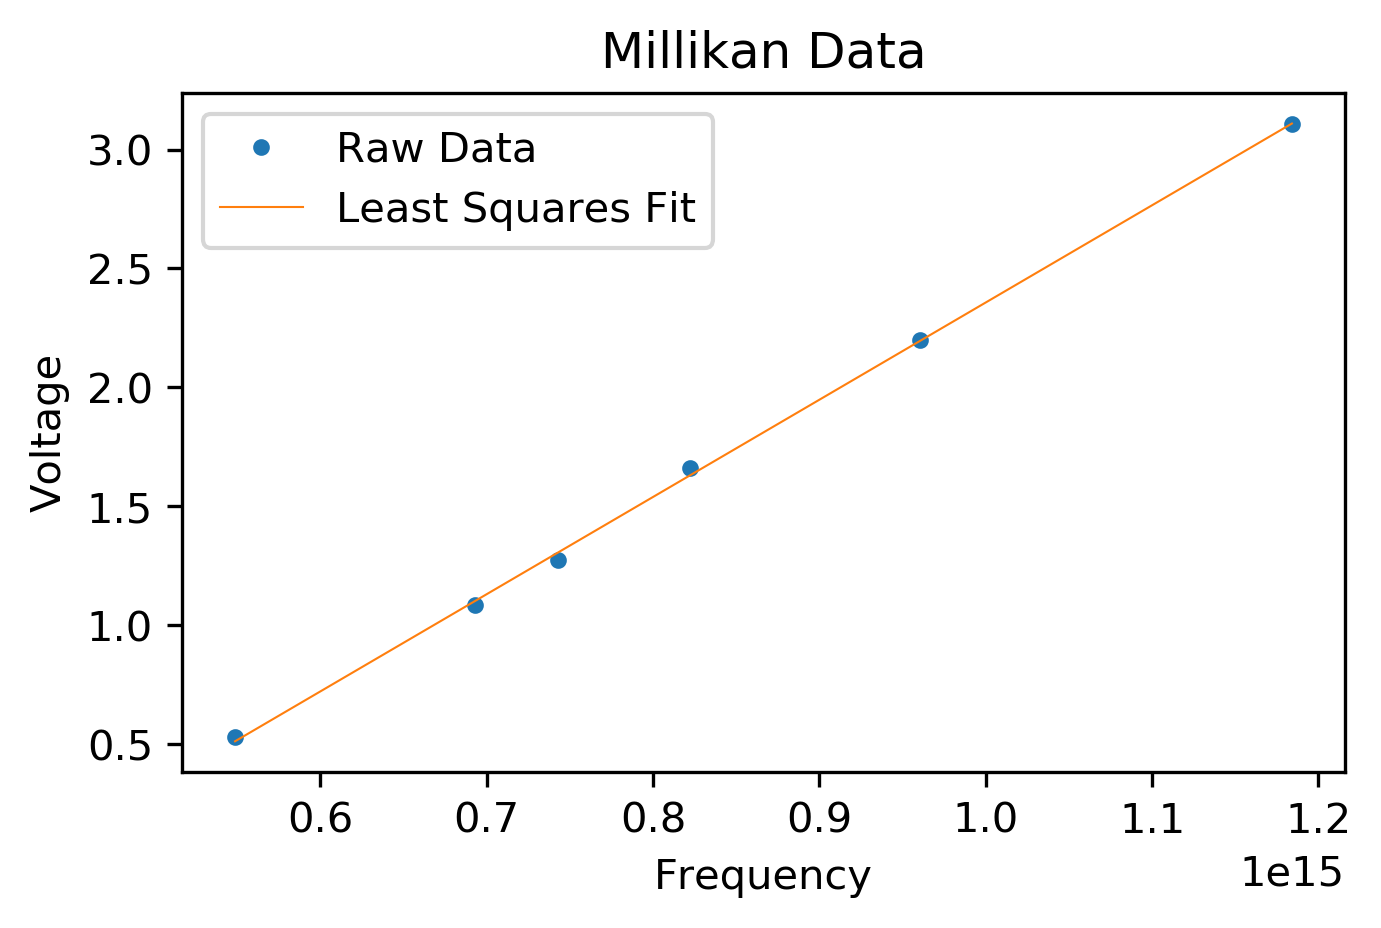

The value for Plancks Constant is 6.5493e-34
The percent error is 1.16%


In [183]:
# read data file
data = np.genfromtxt("./millikan.txt")

# separate x and y values
x = data[:,0]
y = data[:,1]

# Calculate E values
Ex = np.sum(x)/len(x)
Ey = np.sum(y)/len(y)
Exx = np.sum(x**2)/len(x)
Exy = np.sum(x*y)/len(x)

#Calculate m,c from E values
m = (Exy-Ex*Ey)/(Exx-Ex**2)
c = (Exx*Ey-Ex*Exy)/(Exx-Ex**2)
print(f'The value of m is {m}')
print(f'The value of c is {c:4.4f}')

#Calculate mx_i+c for each data point
fit_val =[]
for i in x:
    fit_val.append(m*i+c)

#plot raw data and fit line
plt.figure(5, [5,3], dpi=300)
plt.plot(x,y, ls='', marker ='.', label="Raw Data")
plt.plot(x,fit_val, lw=0.5, label="Least Squares Fit")
plt.legend()
plt.xlabel('Frequency')
plt.ylabel("Voltage")
plt.title("Millikan Data")
plt.show()

# Calculate h and print
e = 1.602e-19
h = 6.626176e-34
h_calc = m*e
print(f'The value for Plancks Constant is {h_calc:4.4e}')

# Calculate percent error and print
error = abs(h_calc-h)/h
print(f'The percent error is {error*100:4.2f}%')

### Exercise 4.4: Accuracy of Integration

a) Write a program to evaluate the integral:

$$I = \int_{-1}^{1}\sqrt{1-x^2}dx$$

with:

$$I = \lim_{n\to\infty}\sum_{k=1}^{N}hy_k$$

where

$$y_k = \sqrt{1-x_k^2}$$ and 
$$x_k = -1+hk$$

for N = 100 with $h=\frac{2}{N}$


b) Increase N for the program to run for about one second or less, how accurate is it? The accepted value is 1.57079632679...

In [197]:
# Create function
def integral(N):
    """This function takes in N which determines 
    how many slices of rectangles to use in the integral.  
    Function returns the total value of the integral over a 
    finite range in a float value"""
    #create the x values to run through
    x = np.linspace(-1,1,N)
    values = []
    #run through x values and append array
    for i in x:
        values.append(np.sqrt(1-i**2))
    #sum array and multiply by h
    I = np.sum(values)*2/N
    return I

answer = integral(100)
print(f"The integral value for N=100 is {answer}")

actual_value = 1.57079632679
#print run time and evaluate function
starttime=time.time()
answer = integral(500000)
endtime=time.time()
print(f"The integral value for large N is {answer}")
print(f'The run time was {endtime-starttime:4.2f} sec')
print(f'The percent error is {abs(answer -actual_value)/actual_value*100:4.4f} %')




The integral value for N=100 is 1.5534179294048953
The integral value for large N is 1.5707931804983108
The run time was 1.07 sec
The percent error is 0.0002 %


### Exercise 5.1: The Trapezoidal Rule

The Trapezoidal integration rule can be defined by the following equation:
$$h[\frac{1}{2}f(a) + \frac{1}{2}f(b) + \sum_{k=1}^{N-1}f(a+kh)]$$

where $h=\frac{(b-a)}{N}$

a) Calculate the approximate distance from velocity values over time using the trapezoidal rule

b) Extend the program to make a graph that shows both the original velocity curve and the distance traveled as a function of time

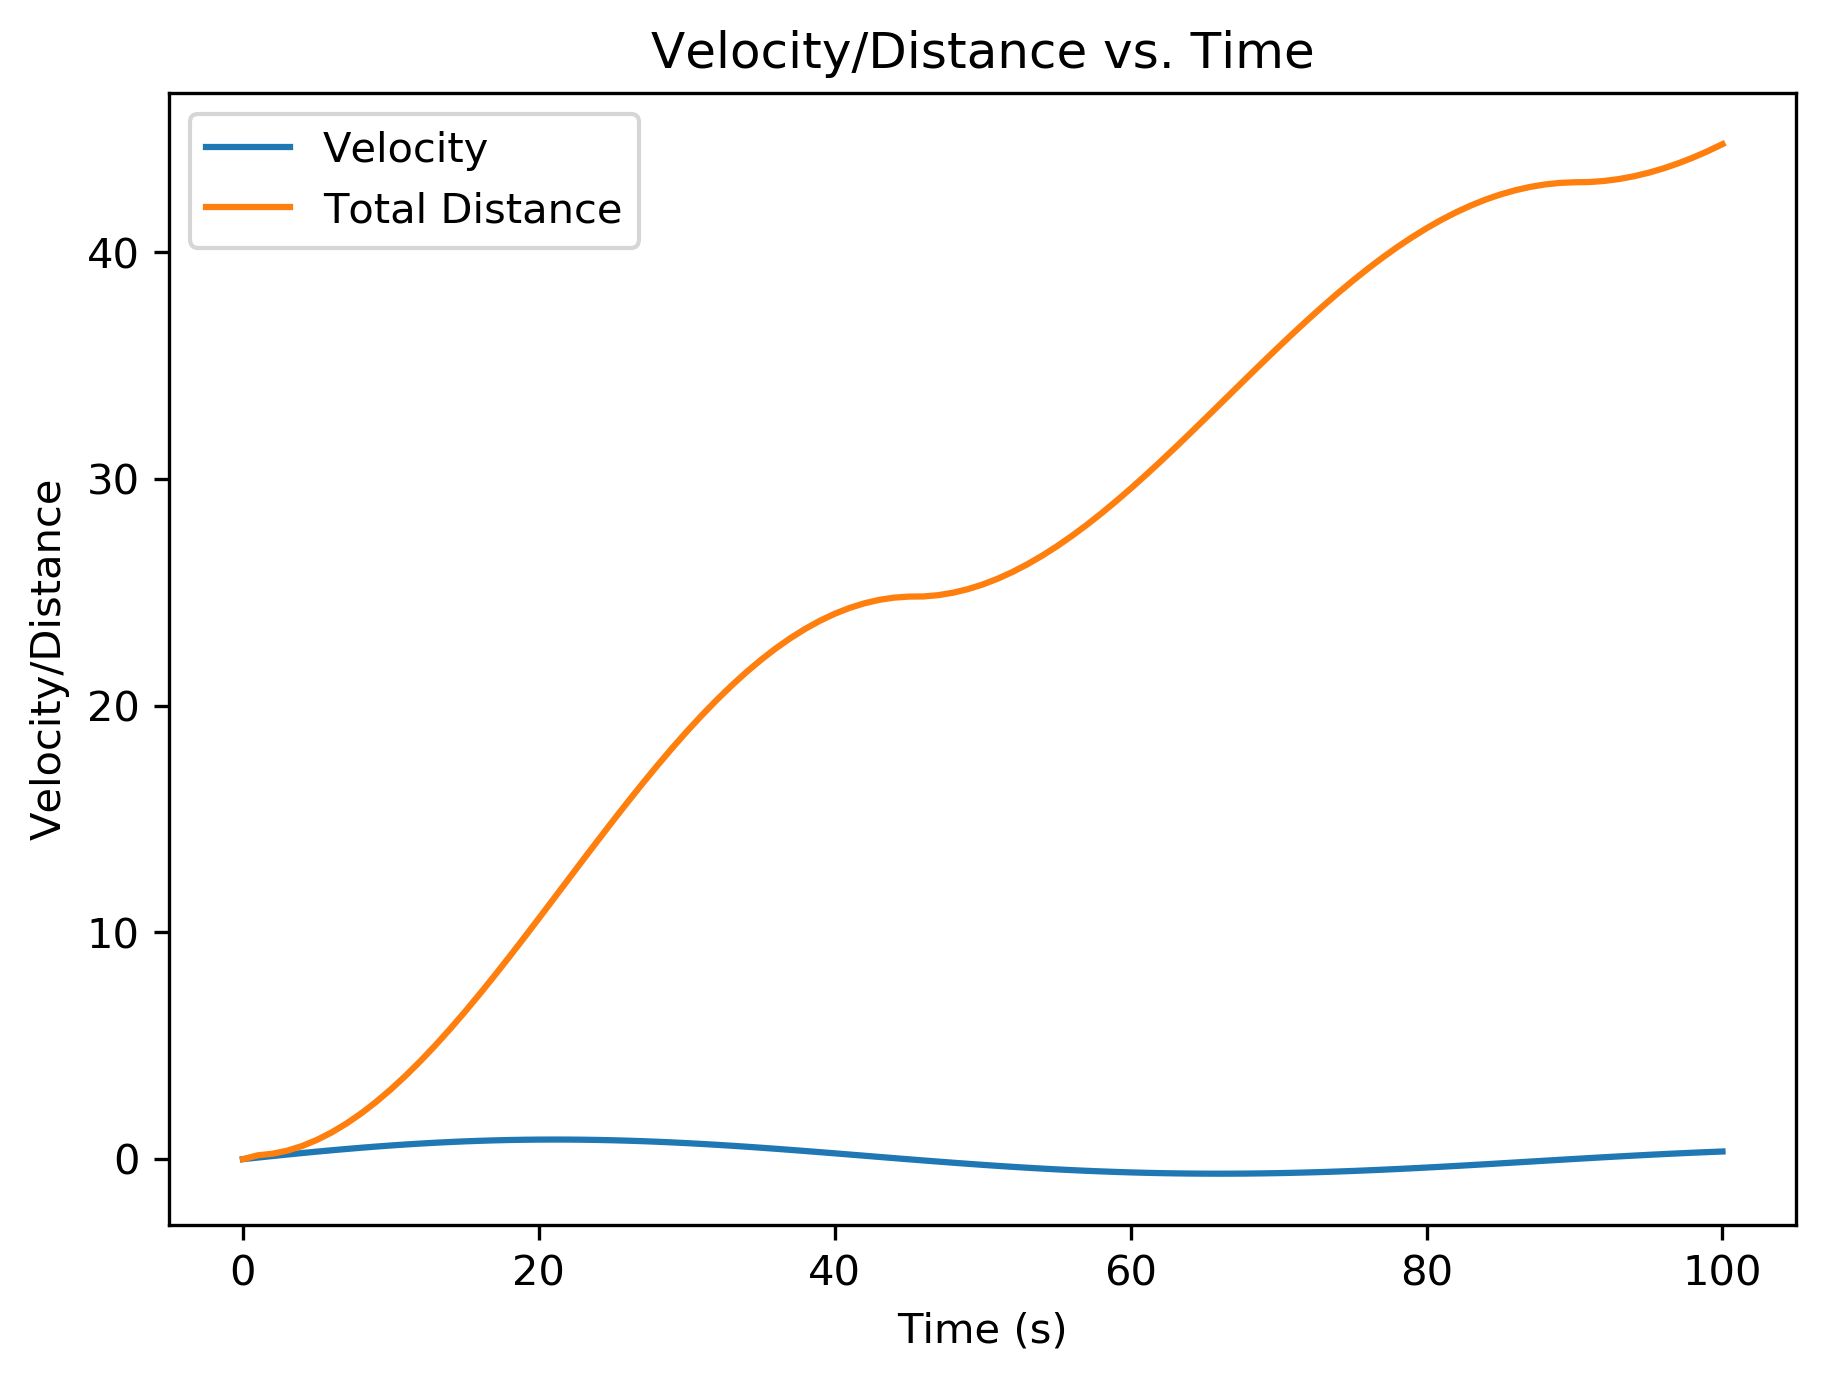

The total distance traveled was 8.2189 meters


In [198]:
#Read the data
data = np.genfromtxt("./velocities.txt")

#separate the columns
vel = data[:,1]
time = data[:,0]

def integral2(N, a, b):
    """Calculates the integral using the trapezoidal rule.  Inputs number of slices N, starting point a and ending point b.  N,a,b must be integers.  Returns float value for integral and an array of floats that represents the total distance traveled at each step."""
    h = (b-a)/N
    I = h*(0.5*vel[a]+0.5*vel[b])
    I2 = abs(h*(1/2*vel[a]+1/2*vel[b]))
    tot = [0]
    #run through time values and append array
    for i in range(N):
        I += h*vel[a+i]
        #Keeps track of total distance at each step
        I2 += abs(vel[a+i])
        tot.append(I2)
    return I, tot

#Run the function and separates answers
ans = integral2(100, 0, 100)
dist = ans[1]

#Plot Results
plt.figure(7, [7,5], dpi=300)
plt.xlabel("Time (s)")
plt.ylabel("Velocity/Distance")
plt.title("Velocity/Distance vs. Time")
plt.plot(time,vel, label="Velocity")

#Plot the total distance traveled
plt.plot(time,dist, label="Total Distance")

plt.legend()
plt.show()

#print the value of total distance traveled
print(f'The total distance traveled was {ans[0]:4.4f} meters')

### Exercise 5.2: Simpsons Rule

Simpson's rule for approximating an integral can be described by the equation:
$$I(a,b) = \frac{1}{3}h[f(a) + f(b) + 4\sum_{k=1}^{N/2}f(a+(2k-1)h) + 2\sum_{k=1}^{N/2-1}f(a+2kh)]$$

a) We will calculate this from x=0 to x=2.

b) Calculate the fractional error compared to the correct value of 4.4

c) increase slices to 100 then to 1000 and compare errors to trapezoidal

In [2]:
def f(x):
    """takes an input x and outputs the results of the function defined as a float"""
    return (x**4-2*x+1)

def simp_rule(f, N, a, b):
    "Performs simpson integration for function f, number of slices N, starting point a, and ending point b.  N must be an integer.  Returns the value of the integral as a float."
    # Define constants
    h = (b-a)/N
    s1 = 0
    s2 = 0
    # loop through the first sum
    for i in range(1,N//2+1):
        s1 += f(a+(2*i-1)*h)
    s1 *= 4 
    #Loop through the second sum
    for j in range(1,N//2):
        s2 += f(a+2*j*h)
    s2 *= 2
    # return the sum of both sums, plus the function values at
    # the start and end point
    return h/3*(f(a)+f(b)+s1+s2)

def trap(f, N, a, b):
    "Performs trapezoidal integration for function f, number of slices N, starting point a, and ending point b.  N must be an integer.  Returns the value of the integral as a float."
    # Define constants
    h = (b-a)/N
    s = 0.5*f(a) + 0.5*f(b)
    #Perform Trapezoid Integral method
    for k in range(1,N):
        s += f(a+k*h)
    return h*s

#Print Results
answer1 = simp_rule(f, 10, 0.0, 2.0)
print(f"The Simpson integral value for N = 10 is {answer1}")
print(f'The fractional error is {abs(answer1-4.4)/4.4:4.8f}')
answer4 = trap(f, 10, 0.0, 2.0)
print(f"The Trapezoid integral value for N = 10 is {answer4}")
print(f'The fractional error is {abs(answer4-4.4)/4.4:4.8f}')

answer2 = simp_rule(f, 100, 0.0, 2.0)
print(f"The Simpson integral value for N = 100 is {answer2}")
print(f'The fractional error is {abs(answer2-4.4)/4.4:4.16f}')
answer5 = trap(f, 100, 0.0, 2.0)
print(f"The Trapezoid integral value for N = 100 is {answer5}")
print(f'The fractional error is {abs(answer5-4.4)/4.4:4.16f}')

answer3 = simp_rule(f, 1000, 0.0, 2.0)
print(f"The Simpson integral value for N = 1000 is {answer3}")
print(f'The fractional error is {abs(answer3-4.4)/4.4:4.16f}')
answer6 = trap(f, 1000, 0.0, 2.0)
print(f"The Trapezoid integral value for N = 1000 is {answer6}")
print(f'The fractional error is {abs(answer6-4.4)/4.4:4.16f}')

The Simpson integral value for N = 10 is 4.400426666666667
The fractional error is 0.00009697
The Trapezoid integral value for N = 10 is 4.50656
The fractional error is 0.02421818
The Simpson integral value for N = 100 is 4.400000042666668
The fractional error is 0.0000000096969699
The Trapezoid integral value for N = 100 is 4.401066656
The fractional error is 0.0002424218181818
The Simpson integral value for N = 1000 is 4.400000000004267
The fractional error is 0.0000000000009697
The Trapezoid integral value for N = 1000 is 4.400010666665601
The fractional error is 0.0000024242421819


As we can see, the simpson integral method was much more accurate than that of the trapezoid integral method.